In [28]:
import sys
#sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/research_Haukeli/Python/windrose')
sys.path.append('/Volumes/SANDISK128/Documents/Research_UiO_50/Python/windrose/')
from windrose import WindroseAxes
import netCDF4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python')
sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/')
import createFolder as cF
import math
%matplotlib inline

In [2]:
from matplotlib import colors

import matplotlib.cm as cm

In [3]:
viridis = plt.get_cmap('viridis')
champ = 255.
no1 = np.array([79,94,26])/champ
no2 = np.array([131,156,45])/champ
no3 = np.array([71,153,112])/champ
no4 = np.array([77,111,157])/champ
no5 = np.array([157,58,55])/champ
no6 = np.array([211,120,50])/champ
no7 = np.array([218,181,70])/champ

cmap = colors.ListedColormap([no1, no2, no3, no4, no5, no6, no7])

In [4]:
m = ['11']#, '12', '01', '02', '03']

In [5]:
savefig = 0
form = 'png'
figdir = '../../Figures/Weathermast'


In [6]:
for month in m:
    if month == '11':
        t = np.arange(7,31)
    if month == '12' or month == '01' or month == '03':
        t = np.arange(1,32)
    if month == '02':
        t = np.arange(1,29)
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    
    for day in t:
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            
        dirnc = '../../Data/Weathermast/Met_%s%s%s_Haukeliseter.nc' %(year,month,day)
        
        f = netCDF4.Dataset(dirnc, 'r')
        double_fence_acc = f.variables['double_fence_accum'][:]
        
        double_fence_acc_mean = np.nanmean(double_fence_acc,axis=1)
        
        
        Series_double_fence_acc_mean = pd.Series(double_fence_acc_mean)
        
        double_fence_24diff = double_fence_acc_mean[Series_double_fence_acc_mean.last_valid_index()] - double_fence_acc_mean[Series_double_fence_acc_mean.first_valid_index()]
#        double_fence_24diff = double_fence_acc_mean[-1] - double_fence_acc_mean[0]
        
        print(year+'-'+month+'-'+day+':', double_fence_24diff)
        
        f.close()

2016-11-07: 5.68434188608e-14
2016-11-08: -0.0133333333334
2016-11-09: 0.3
2016-11-10: 0.126666666667
2016-11-11: -0.05
2016-11-12: 3.49
2016-11-13: 1.47666666667
2016-11-14: 3.43333333333
2016-11-15: 4.44333333333
2016-11-16: 14.66
2016-11-17: 9.01666666667
2016-11-18: 4.79333333333
2016-11-19: [[ nan  nan  nan ...,  nan  nan  nan]]
2016-11-20: 0.0
2016-11-21: 0.42
2016-11-22: 10.3333333333
2016-11-23: 

/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


3.45
2016-11-24: 1.24
2016-11-25: -0.12
2016-11-26: 0.276666666667
2016-11-27: 0.153333333333
2016-11-28: -0.0733333333334
2016-11-29: 2.81666666667
2016-11-30: 2.27


In [7]:
double_fence_acc = []
double_fence_acc_mean = []
wind_dir_10m = []
wind_speed_10m = []
for month in m:
    if month == '11':
        t = np.arange(7,31)
    if month == '12' or month == '01' or month == '03':
        t = np.arange(1,32)
    if month == '02':
        t = np.arange(1,29)
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    f = dict()
    
    tid = dict()
    for day in t:
        
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            
        dirnc = '../../Data/Weathermast/Met_%s%s%s_Haukeliseter.nc' %(year,month,day)
        
        f[int(year+month+day)] = netCDF4.Dataset(dirnc, 'r')
        double_fence_acc.append(f[int(year+month+day)].variables['double_fence_accum'][:])
        double_fence_acc_mean.append(np.nanmean(f[int(year+month+day)].variables['double_fence_accum'][:], axis=1))
       # double_fence_acc_mean.append(np.nanmean(double_fence_acc,axis=1))

        wind_dir_10m.append(f[int(year+month+day)].variables['10m_wind_dir_mast1'][:])
    #    tid[int(year+month+day)] = np.arange(wind_dir_10m.shape[0])

        wind_speed_10m.append(f[int(year+month+day)].variables['10m_wind_speed_mast1'][:])
        
        f[int(year+month+day)].close

/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in greater


In [8]:
ax0 = WindroseAxes.from_ax()
ax0.bar(np.array(wind_dir_10m)[np.where(~ np.isnan(wind_dir_10m) )], 
       np.array(wind_speed_10m)[np.where(~ np.isnan(wind_dir_10m) )], 
       normed=True, opening=0.8, edgecolor ='white',cmap=cmap, bins = np.arange(0,24,4))
ax0._info['bins']
ax0.set_legend()
ax0.legend(title = 'Wind$_{10m}$ [m s$^{-1}$]', fontsize = 12)
ax0.get_legend().get_title().set_fontsize(16)
ax0.tick_params(labelsize = 16)
ax0.set_title('Wind: 08112016-31032017', fontsize = 16, y=1.08,fontweight='bold')
if savefig == 1:
    fig_name = 'Wind_distribution_2016_2017.png'
    cF.createFolder('%s/' %(figdir))
    plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight')
    print('plot saved: %s/%s' %(figdir,fig_name))

In [9]:
# attach the last 9 minutes from the previous day to calculate the rolling mean every 10 minutes
dofe_acc = []
wind_dir = []
wind_speed = []
for i in range(np.array(double_fence_acc_mean).shape[0]-1):
    pp = (np.concatenate((np.array(double_fence_acc_mean)[i,-9:],np.array(double_fence_acc_mean)[i+1,:])))
    dofe_acc.append(pp)
    wd = (np.concatenate((np.array(wind_dir_10m)[i,-9:], np.array(wind_dir_10m)[i+1,:])))
    wind_dir.append(wd)
    ws = (np.concatenate((np.array(wind_speed_10m)[i,-9:], np.array(wind_speed_10m)[i+1,:])))
    wind_speed.append(ws)

In [10]:
# Calculate the moving average. That is, take
# the first ten values, average them, 
# then drop the first and add the eleventh, etc.
#dofe_acc = pd.DataFrame(np.array(dofe_acc)[:,9:])
dofe_acc = pd.DataFrame(np.array(dofe_acc)[:,:])
dofe_acc_rolling = dofe_acc.rolling(window=10,min_periods=7,axis=1).mean()
dofe_acc_rolling = dofe_acc_rolling.values
dofe_acc_rolling = np.array(dofe_acc_rolling)[:,9:]

wind_dir = pd.DataFrame(np.array(wind_dir)[:,:])
wind_dir_rolling = wind_dir.rolling(window=10,axis=1).mean()
wind_dir_rolling = wind_dir_rolling.values
wind_dir_rolling = np.array(wind_dir_rolling)[:,9:]

wind_speed = pd.DataFrame(np.array(wind_speed)[:,:])
wind_speed_rolling = wind_speed.rolling(window=10,axis=1).mean()
wind_speed_rolling = wind_speed_rolling.values
wind_speed_rolling = np.array(wind_speed_rolling)[:,9:]

In [11]:
diff = np.zeros(shape=(np.array(dofe_acc_rolling)[:,9:].shape))#/60))
#diff[:] =  np.nan

#for i in np.arange(np.array(double_fence_acc_mean).shape[0]):#/60):
for i in range(0,np.array(dofe_acc_rolling)[:,9:].shape[1]-1):
    diff[:,int(i)] = np.array(dofe_acc_rolling)[:,9+int(i)+1] - np.array(dofe_acc_rolling)[:,9+int(i)]

In [12]:
ax0 = WindroseAxes.from_ax()
ax0.bar(wind_dir_rolling[np.logical_and(~np.isnan(dofe_acc_rolling), dofe_acc_rolling >= 0.)], 
        wind_speed_rolling[np.logical_and(~np.isnan(dofe_acc_rolling), dofe_acc_rolling >= 0.)], 
       normed=True, opening=0.8, edgecolor ='white',cmap=cmap, bins = np.arange(0,24,4))
ax0._info['bins']
ax0.set_legend()
ax0.legend(title = 'Wind$_{10m}$ [m s$^{-1}$]', fontsize = 12)
ax0.get_legend().get_title().set_fontsize(16)
ax0.tick_params(labelsize = 16)
ax0.set_title('Wind during precipiation events: 08112016-31032017', fontsize = 16, y=1.08,fontweight='bold')
if savefig == 1:
    fig_name = 'Wind_precip_events_2016_2017'
    cF.createFolder('%s/' %(figdir))
    plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight')
    print('plot saved: %s/%s' %(figdir,fig_name))

/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/numpy/lib/function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


In [13]:
def arange_daily(RR_1):
    
    var = [] 
### arange daily values in an array    
    for i in range(0,int(RR_1.shape[0]/24)-1):
        var.append(RR_1[i*24:(i+1)*24+1])

    var = np.array(var)
    return(var)

def valid_values(RR_1):
    var = arange_daily(RR_1)
### mask missing values with NaN
    for i in range(0,int(var.shape[0])):

        idx = np.where(var[i,:] == -9999)
        var[i,idx] = np.nan
        
    return(var)

In [14]:
station = 'Haukeliseter'
#year = 2016
#month = 12
#day = 21

for month in m:
    if month == '11':
        t = np.arange(7,31)
    if month == '12' or month == '01' or month == '03':
        t = np.arange(1,32)
    if month == '02':
        t = np.arange(1,29)
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    
    for day in t:
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            

In [41]:
year = 2016
month = '11'
day = 23

[ 138.66  138.66  138.66 ...,  271.64  272.63  274.23]


/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


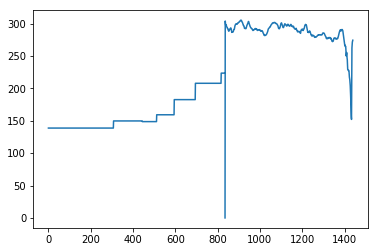

In [42]:
dirnc = '../../Data/Weathermast/Met_%s%s%s_Haukeliseter.nc' %(year,month,day)


f = netCDF4.Dataset(dirnc, 'r')
wind_dir_10m = f.variables['10m_wind_dir_mast1'][:]

print(wind_dir_10m)
plt.plot(wind_dir_10m)

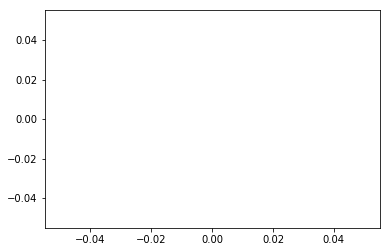

In [ ]:
        dirnc = '../../Data/Weathermast/Met_%s%s%s_Haukeliseter.nc' %(year,month,day)
        txt_dir      = '../../Data/Eklima/'+station
        txt_filename = 'obs_'+str(year)+str(month)

        #f1 = netCDF4.Dataset('../../Data/Weathermast/Met_%s%s%s_Haukeliseter.nc' %(year,month,day-1))
        f = netCDF4.Dataset(dirnc, 'r')



        double_fence_acc = f.variables['double_fence_accum'][:]
        double_fence_acc_mean = np.nanmean(double_fence_acc,axis=1)

        wind_dir_10m = f.variables['10m_wind_dir_mast1'][:]
        tid = np.arange(wind_dir_10m.shape[0])

        wind_speed_10m = f.variables['10m_wind_speed_mast1'][:]

        diff = np.empty(shape=int(double_fence_acc_mean.shape[0]))#/60))
        diff[:] =  np.nan

        for i in np.arange(double_fence_acc_mean.shape[0]-1):#/60):
            diff[int(i)] = double_fence_acc_mean[int(i)+1] -double_fence_acc_mean[int(i)]

        print('easterlies:', np.nansum(diff[np.logical_and(wind_dir_10m[:] >= 45,
                              wind_dir_10m[:] < 225)]))

        print('westerlies:', np.nansum(diff[np.logical_or(np.logical_and(wind_dir_10m[:] >= 225,
                                            wind_dir_10m[:] <= 360),
                             wind_dir_10m[:] < 45)]))

        print('total:', np.nansum(diff[np.logical_and(wind_dir_10m[:] >= 45,
                              wind_dir_10m[:] < 225)]) + \
        np.nansum(diff[np.logical_or(np.logical_and(wind_dir_10m[:] >= 225,
                                            wind_dir_10m[:] <= 360),
                             wind_dir_10m[:] < 45)]))

        tt = np.arange(wind_dir_10m.shape[0])
        (tt[np.logical_and(wind_dir_10m[:] >= 45,
                              wind_dir_10m[:] < 225)])/60

        (tt[np.logical_or(np.logical_and(wind_dir_10m[:] >= 225,
                                            wind_dir_10m[:] <= 360),
                             wind_dir_10m[:] < 45)])/60

        k = np.arange(0,wind_dir_10m.shape[0]+10,10)
    #    k = np.arange(0,wind_dir_10m.shape[0]+30,30)
     #   k = np.arange(0,wind_dir_10m.shape[0]+60,60)

        rrdd = np.deg2rad(wind_dir_10m)
        wd_deg = []
        ws = []
        for l in range(k.shape[0]-1):
            totrx = 0.0
            totry = 0.0
            for i in np.arange(k[l], k[l+1]):
                totrx = (wind_speed_10m[i]*(math.sin(rrdd[i]))) + totrx
                totry = (wind_speed_10m[i]*(math.cos(rrdd[i]))) + totry
    


            if totry == 0.0:
                r_dir = 0
            else:
                r_dir = math.atan(totrx/totry) # avg r_wind dir
            if totry < 0.:
                r_dir = r_dir + np.pi

            wd_deg.append(np.rad2deg(r_dir))
    
            ws.append(np.sqrt( (totrx**2 + totry**2)/10**2 ))
        for i in range(np.array(wd_deg).shape[0]):
            if np.array(wd_deg)[i] < 0:
                (wd_deg)[i] = 360. + (wd_deg)[i]

        f.close()

        Haukeli = pd.read_csv(txt_dir+'/'+txt_filename+'.txt', sep =';', header=19, skipfooter = 2, engine = 'python')

        #year  = Haukeli['Year']
        #month = Haukeli['Mnth']
        #date  = Haukeli['Date']
        time  = Haukeli['Time(UTC)']

        obsvar = Haukeli['RR_1'].astype(float)         # Precipitation (1 hour); [mm]

        obsvar_DD = Haukeli['DD'].astype(float)             # Wind direction (FF); [degrees]
        obsvar_FF = Haukeli['FF'].astype(float)             # Wind speed (10 meters above ground);m/s

        obsvar0 = valid_values(obsvar)

        obsvar0_DD = valid_values(obsvar_DD)
        obsvar0_FF = valid_values(obsvar_FF)

        RR_1 = np.empty(shape=(obsvar0.shape[0], obsvar0.shape[1]+1))
        RR_1[:,:] = np.nan

        DD = np.empty(shape=(obsvar0_DD.shape[0], obsvar0_DD.shape[1]+1))
        DD[:,:] = np.nan

        for d in range(0,obsvar0.shape[0]):
            RR_1[int(d)-1,:] = np.append(obsvar0[int(d)-1,:], obsvar0[int(d),0])
            DD[int(d)-1,:] = np.append(obsvar0_DD[int(d)-1,:], obsvar0_DD[int(d),0])

        print('easterlies:', np.nansum(obsvar0[int(day)-1,np.logical_and(obsvar0_DD[int(day)-1,:] >= 45,
                                            obsvar0_DD[int(day)-1,:] < 225)]))

        print('westerlies:', np.nansum(obsvar0[int(day)-1,np.logical_or(np.logical_and(obsvar0_DD[int(day)-1,:] >= 225,
                                            obsvar0_DD[int(day)-1,:] <= 360),
                                            obsvar0_DD[int(day)-1,:] <  45 )]))

        print('total:', np.nansum(obsvar0[int(day)-1,np.logical_and(obsvar0_DD[int(day)-1,:] >= 45,
                                            obsvar0_DD[int(day)-1,:] < 225)]) + \
        np.nansum(obsvar0[int(day)-1,np.logical_or(np.logical_and(obsvar0_DD[int(day)-1,:] >= 225,
                                            obsvar0_DD[int(day)-1,:] <= 360),
                                            obsvar0_DD[int(day)-1,:] <  45 )]))

        tt = time[0:25]
        #tt[np.logical_and(obsvar0_DD[int(day)-1,:] >= 45,
         #                                           obsvar0_DD[int(day)-1,:] < 225)]

        #tt[np.logical_and(obsvar0_DD[int(day)-1,:] >= 225,
         #                                           obsvar0_DD[int(day)-1,:] <= 360,
          #                                          obsvar0_DD[int(day)-1,:] <  45 )]




##########################################################################################################################
        fig = plt.figure(figsize=(8,8))

        fig.text(.0, .5, '10m - Wind direction [$^{o}$]', ha='center', va='center', rotation='vertical', fontsize = 16)

        ax1 = fig.add_subplot(311)
        ax1.plot(obsvar0_DD[int(day)-1,:],'.')
        ax1.hlines(270,0,obsvar0_DD.shape[1])
        ax1.hlines(180,0,obsvar0_DD.shape[1])
        ax1.hlines(90,0,obsvar0_DD.shape[1])
        ax1.hlines(45,0,obsvar0_DD.shape[1], linestyles='dashed')
        ax1.hlines(225,0,obsvar0_DD.shape[1], linestyles='dashed')

        ax1.fill_between(np.arange(obsvar0_DD.shape[1]), 225, 360,  facecolor='gray', alpha=0.5)
        ax1.fill_between(np.arange(obsvar0_DD.shape[1]), 0, 45,  facecolor='gray', alpha=0.5)

        ax1.set_xlim([0, obsvar0_DD.shape[1]-1])
        ax1.set_ylim([0, 360])
        ax1.set_xticks(np.arange(0.,obsvar0_DD.shape[1],2))
        ax1.set_yticks(np.arange(0,405,45))
        fig.suptitle("%s-%s-%s" %(year,month,day), fontsize=14,fontweight='bold')
        ax1.tick_params(labelsize=14)
        #######################################################################################################
        ax2 = fig.add_subplot(312)
        ax2.plot(wind_dir_10m,'.')
        ax2.hlines(270,0,wind_dir_10m.shape[0])
        ax2.hlines(180,0,wind_dir_10m.shape[0])
        ax2.hlines(90,0,wind_dir_10m.shape[0])
        ax2.hlines(45,0,wind_dir_10m.shape[0], linestyles='dashed')
        ax2.hlines(225,0,wind_dir_10m.shape[0], linestyles='dashed')

        ax2.fill_between(np.arange(wind_dir_10m.shape[0]), 225, 360,  facecolor='gray', alpha=0.5)
        ax2.fill_between(np.arange(wind_dir_10m.shape[0]), 0, 45,  facecolor='gray', alpha=0.5)

        ax2.set_xlim([0, wind_dir_10m.shape[0]])
        ax2.set_ylim([0, 360])
        ax2.set_xticks(np.arange(0,wind_dir_10m.shape[0]+120,120))
        ax2.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24 ])
        #ax.set_xticks(np.arange(0,wind_dir_10m.shape[0]+120,120), [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24 ])
        ax2.set_yticks(np.arange(0,405,45))
        ax2.tick_params(labelsize=14)
        #######################################################################################################
        ax3 = fig.add_subplot(313)
        wd_deg = np.asarray(wd_deg)
        ax3.plot(wd_deg,'.')
        ax3.hlines(270,0,wd_deg.shape[0])
        ax3.hlines(180,0,wd_deg.shape[0])
        ax3.hlines(90,0,wd_deg.shape[0])
        ax3.hlines(45,0,wd_deg.shape[0], linestyles='dashed')
        ax3.hlines(225,0,wd_deg.shape[0], linestyles='dashed')

        ax3.fill_between(np.arange(wd_deg.shape[0]), 225, 360,  facecolor='gray', alpha=0.5)
        ax3.fill_between(np.arange(wd_deg.shape[0]), 0, 45,  facecolor='gray', alpha=0.5)

        ax3.set_xlim([0, wd_deg.shape[0]-12])
        ax3.set_ylim([0, 360])
        ax3.set_xticks(np.arange(0,wd_deg.shape[0]+12,12))
        ax3.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24 ])
        ##ax.set_xticks(np.arange(0,wind_dir_10m.shape[0]+120,120), [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24 ])
        ax3.set_yticks(np.arange(0,405,45))
        ax3.tick_params(labelsize=14)

        plt.xlabel('time [h]', fontsize=16)
        if savefig == 1:
            cF.createFolder('%s/10m_wind/' %(figdir))
            fig_name = '%s%s%s.png' %(year,month,day)
            plt.savefig('%s/10m_wind/%s' % (figdir, fig_name), format = form, bbox_inches='tight')
            print('plot saved: %s/%s' %(figdir,fig_name))
        else:
            plt.show()
        plt.close()

In [ ]:
pd.DataFrame((~np.nan(wind_dir_10m)))

In [ ]:
a = np.arange(wind_dir_10m.shape[0])

In [ ]:
westerlies_idx = a[np.logical_or(np.logical_and((wind_dir_rolling[8,:] >= 202.5), 
                             (wind_dir_rolling[8,:] <= 360.)), 
                   wind_dir_rolling[8,:] <22.5)]

easterlies_idx = a[np.logical_and(wind_dir_rolling[8,:] >= 22.5,
                              wind_dir_rolling[8,:] < 202.5)]

In [ ]:
sub_idx = []

for i in range(0,westerlies_idx.shape[0]-1):
#for i in range(0,76):
   # print(i)
    if westerlies_idx[i]+1 == westerlies_idx[i+1]:
        continue
        #print( westerlies_idx[i], westerlies_idx[i+1])
    else:
        #print(i)
        sub_idx.append(i)

In [ ]:
westerly = []
easterly = []
for i in np.arange(0,np.array(sub_idx).shape[0]+1):
#for i in np.arange(1,5):
  #  print(i)
    if i == 0:
        westerly_duration = (westerlies_idx[ sub_idx[0]] - westerlies_idx[0])
    elif i == np.array(sub_idx).shape[0]:
        westerly_duration = (westerlies_idx[-1] - westerlies_idx[ sub_idx[np.array(sub_idx).shape[0]-1]+1])
    else:
        westerly_duration = (westerlies_idx[ sub_idx[i]] - westerlies_idx[ sub_idx[i-1]+1])
    if westerly_duration >= 28:
        if i == 0:
            westerly = np.concatenate((westerly, westerlies_idx[ 0: sub_idx[0]+1]))
#            print(westerly_duration, RR_westerly)
        elif i == np.array(sub_idx).shape[0]:
            westerly = np.concatenate((westerly, westerlies_idx[ sub_idx[np.array(sub_idx).shape[0]-1]+1 : ]))
 #           print(westerly_duration, RR_westerly)
        else:
            westerly = np.concatenate((westerly, westerlies_idx[ sub_idx[i-1]+1 : sub_idx[i]+1]))
  #          print(westerly_duration, RR_westerly)
    if westerly_duration < 28:
       # print(westerly_duration)
        easterly = np.concatenate((easterly,westerlies_idx[ sub_idx[i-1]+1 : sub_idx[i]+1]))

westerly = westerly.astype(int)
easterly = easterly.astype(int)

In [ ]:
seconds = 495
m, s = divmod(seconds, 60)
h, m = divmod(m, 60)

print('{:d}:{:02d}:{:02d}'.format(h, m, s)) # Python 3

In [ ]:
easterlies_idx.shape[0]+westerly.shape[0]+easterly.shape[0]

In [ ]:
np.nansum(diff[easterlies_idx]) + np.nansum(diff[easterly])

In [ ]:
np.nansum(diff[westerly])

In [ ]:
np.nansum(diff[easterlies_idx]) + np.nansum(diff[easterly])+np.nansum(diff[westerly])

In [ ]:
sub_idx